## Use Case
Building a machine learning model to accurately predict if patient have diabetes

## **Dataset details:**
- **Gender**: gender
- **Age**: age
- **Hypertension**: hypertension
- **Heart Disease**: heart_disease
- **Smoking History**: smoking_history
- **BMI**: bmi
- **Average Blood Glucose levels**: HbA1c_level
- **Blood Glucose Level**: blood_glucose_level
- **Outcome**: diabetes

# 1) Exploratory Data Analysis

In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, balanced_accuracy_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import early_stopping
import pandas as pd
import warnings
import logging
warnings.simplefilter(action = "ignore") 
warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger("lightgbm").setLevel(logging.ERROR)


In [33]:
# Load the new dataset
csv_file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(csv_file_path)

# Renaming columns to match the new dataset structure
df.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'Heart_Disease',
    'smoking_history': 'Smoking_History',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1c_Level',
    'blood_glucose_level': 'Blood_Glucose_Level',
    'diabetes': 'Outcome'
}, inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_Disease        100000 non-null  int64  
 4   Smoking_History      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_Level          100000 non-null  float64
 7   Blood_Glucose_Level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [34]:
# The first 5 observation units of the data set were accessed.
df.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [35]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(100000, 9)

In [36]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_Disease        100000 non-null  int64  
 4   Smoking_History      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_Level          100000 non-null  float64
 7   Blood_Glucose_Level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,100000.0,41.885856,22.516840,0.08,10.00,24.00,43.00,60.00,73.00,80.00,80.0000,80.00
Hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.00
Heart_Disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.00
BMI,100000.0,27.320767,6.636783,10.01,19.18,23.63,27.32,29.58,35.47,39.49,48.7901,95.69
HbA1c_Level,100000.0,5.527507,1.070672,3.50,4.00,4.80,5.80,6.20,6.60,6.60,8.8000,9.00
Blood_Glucose_Level,100000.0,138.058060,40.708136,80.00,85.00,100.00,140.00,159.00,200.00,200.00,280.0000,300.00
Outcome,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.00


In [38]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    91.5
1     8.5
Name: count, dtype: float64

In [39]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    91500
1     8500
Name: count, dtype: int64

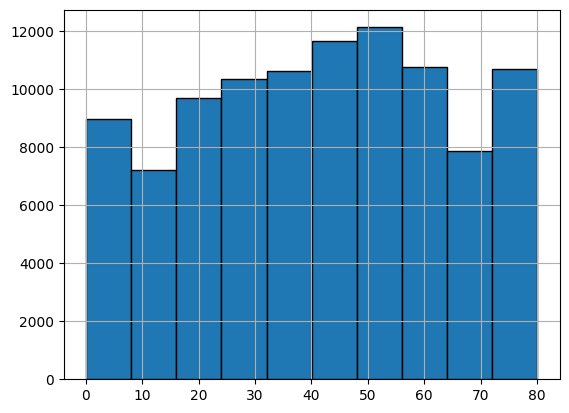

In [40]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [41]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 80.0 Min Age: 0.08


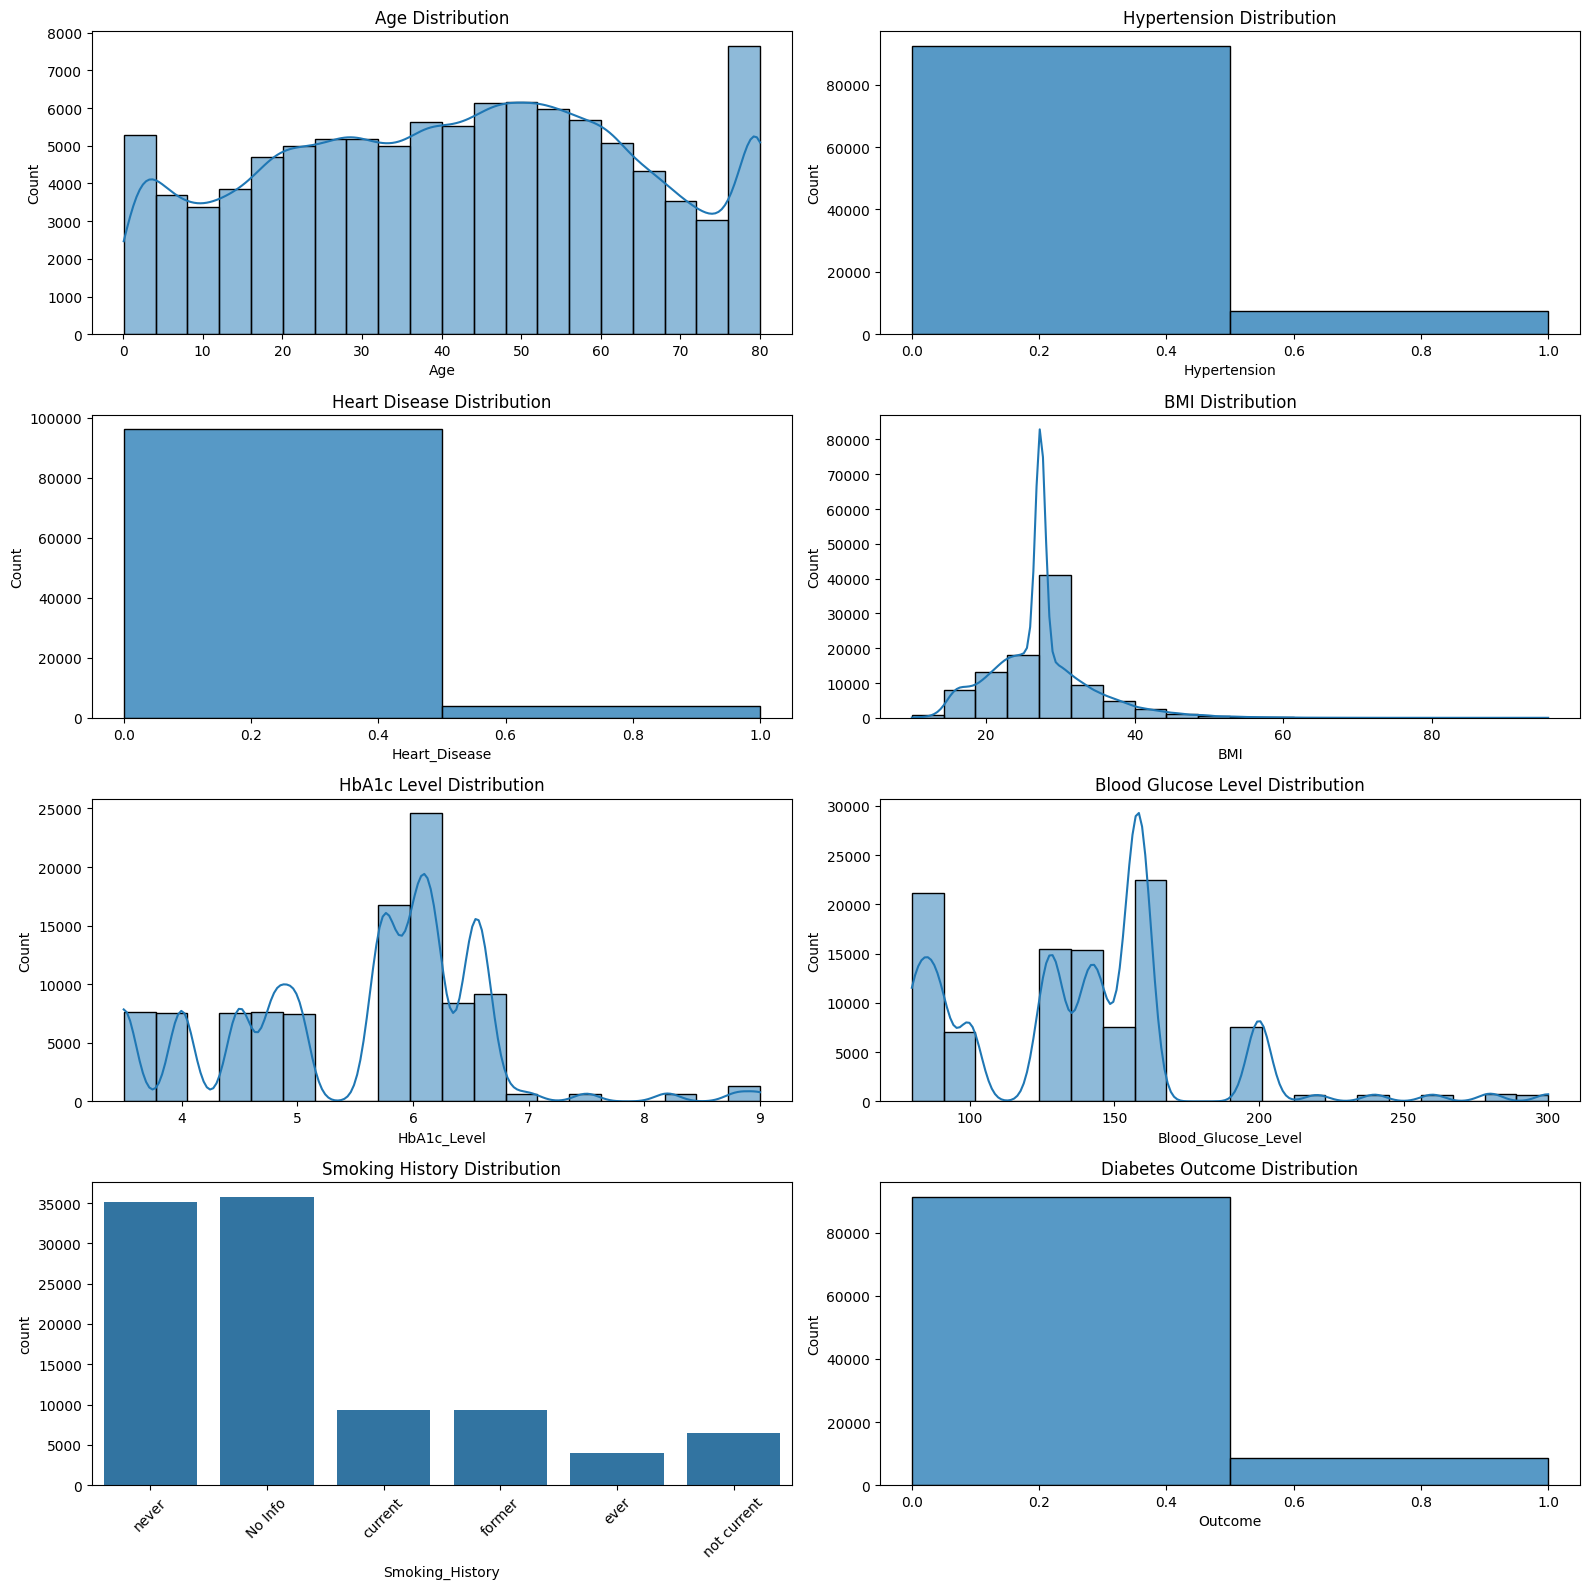

In [42]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")

sns.histplot(df.Hypertension, bins=2, kde=False, ax=ax[0, 1])
ax[0, 1].set_title("Hypertension Distribution")

sns.histplot(df.Heart_Disease, bins=2, kde=False, ax=ax[1, 0])
ax[1, 0].set_title("Heart Disease Distribution")

sns.histplot(df.BMI, bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title("BMI Distribution")

sns.histplot(df.HbA1c_Level, bins=20, kde=True, ax=ax[2, 0])
ax[2, 0].set_title("HbA1c Level Distribution")

sns.histplot(df.Blood_Glucose_Level, bins=20, kde=True, ax=ax[2, 1])
ax[2, 1].set_title("Blood Glucose Level Distribution")

sns.countplot(x=df.Smoking_History, ax=ax[3, 0])
ax[3, 0].set_title("Smoking History Distribution")
ax[3, 0].set_xticklabels(ax[3, 0].get_xticklabels(), rotation=45)

sns.histplot(df.Outcome, bins=2, kde=False, ax=ax[3, 1])
ax[3, 1].set_title("Diabetes Outcome Distribution")

plt.tight_layout()
plt.show()

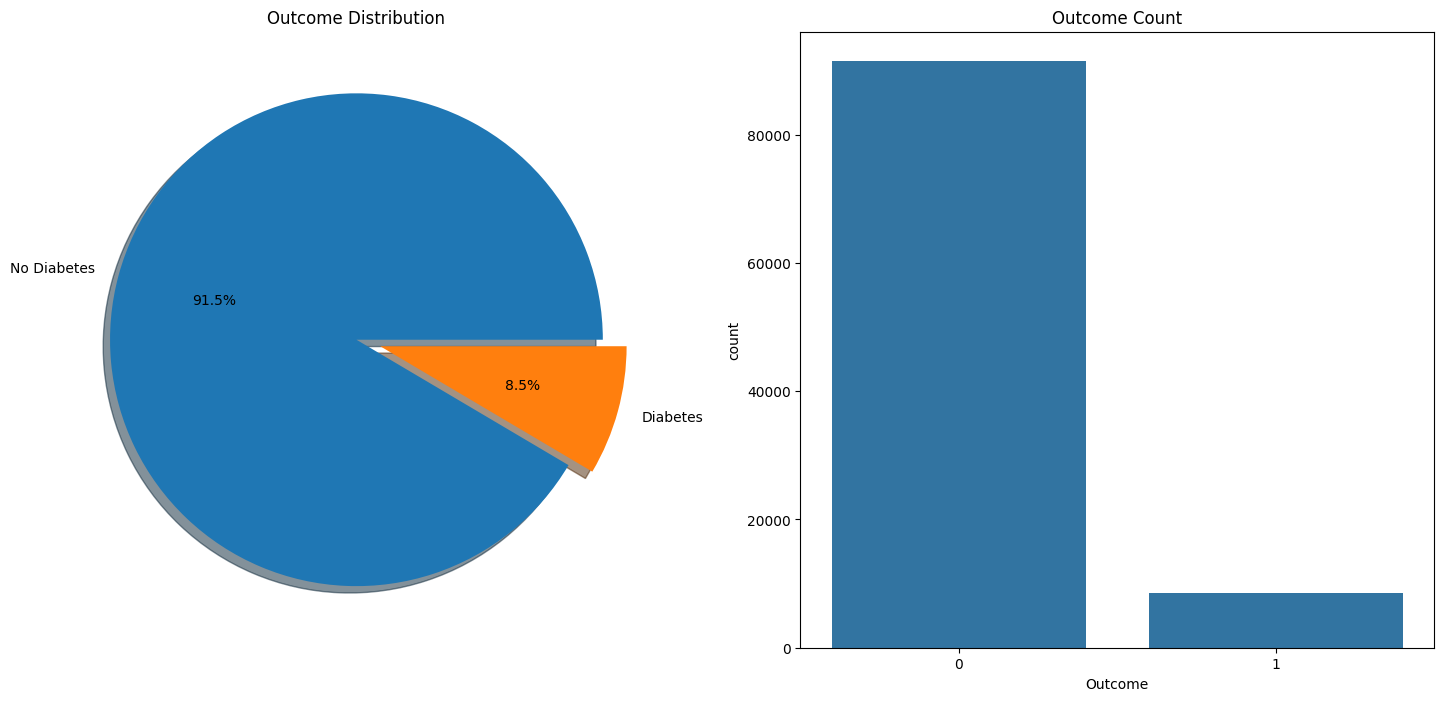

In [43]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, labels=['No Diabetes', 'Diabetes']
)
ax[0].set_title('Outcome Distribution')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Corrected the x argument
ax[1].set_title('Outcome Count')

plt.show()

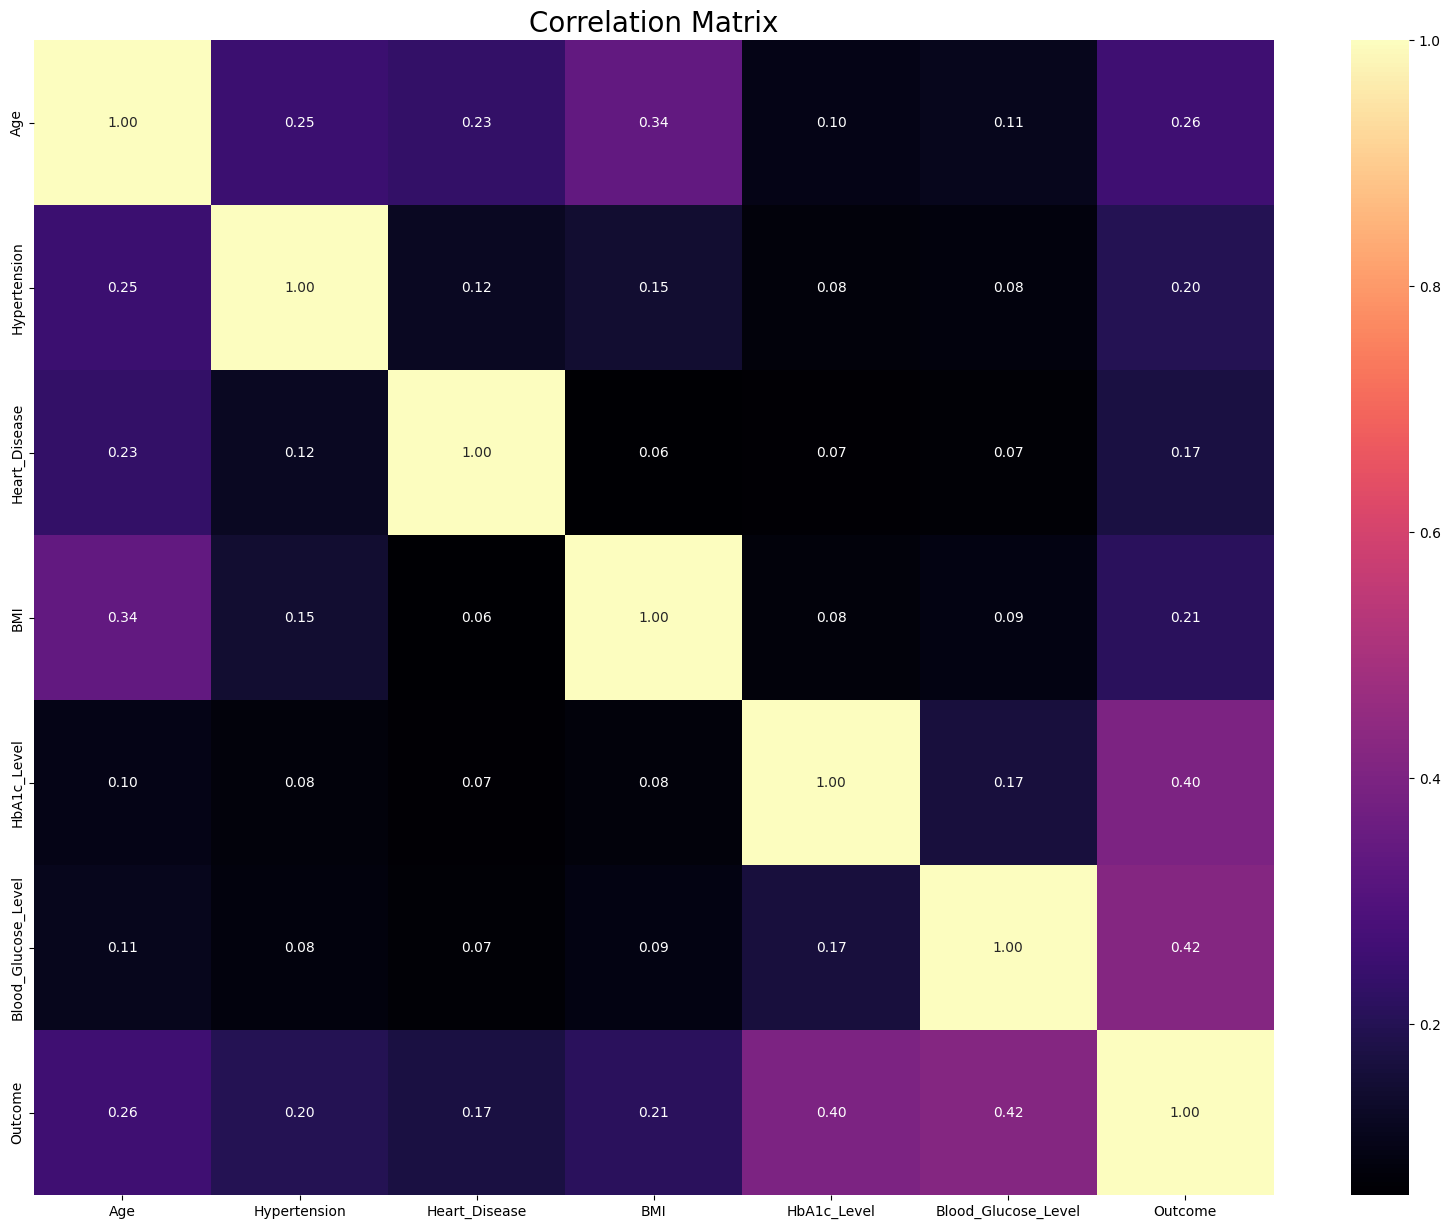

In [44]:
# Correlation matrix graph of the data set
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)

plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We notice that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [45]:
df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']] = df[['BMI', 'Blood_Glucose_Level', 'HbA1c_Level']].replace(0, np.nan)
# Check for missing values
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Smoking_History        0
BMI                    0
HbA1c_Level            0
Blood_Glucose_Level    0
Outcome                0
dtype: int64

## 2.2) Outlier Observation Analysis

BMI yes (Outliers detected)
HbA1c_Level yes (Outliers detected)
Blood_Glucose_Level yes (Outliers detected)


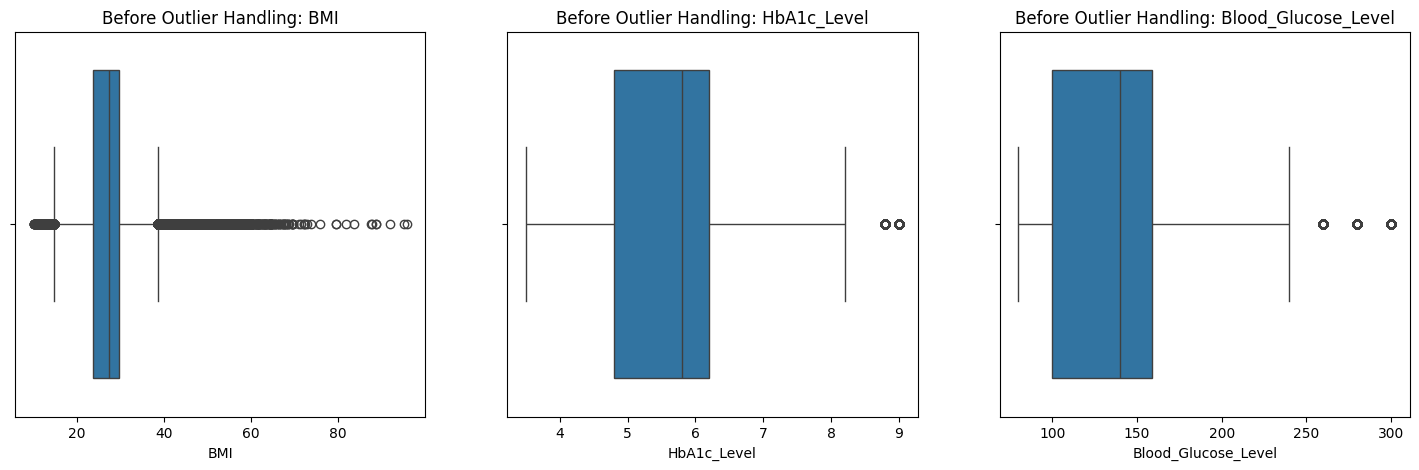

In [46]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# List of features to check for outliers
features_to_check = ['BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Check if any values exceed the upper bound (outliers)
    if (df[feature] > upper).any() or (df[feature] < lower).any():
        print(feature, "yes (Outliers detected)")
    else:
        print(feature, "no (No outliers)")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Before Outlier Handling: {feature}")
plt.show()

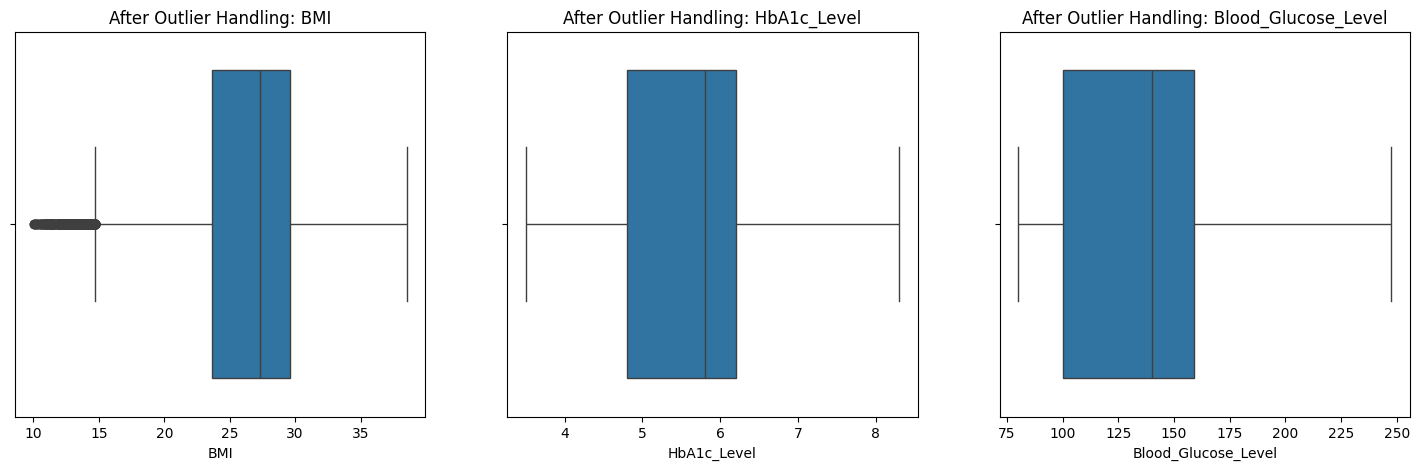

In [47]:
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR  # We only cap upper outliers
    
    # Replace values above the upper bound with the upper bound
    df.loc[df[feature] > upper, feature] = upper

# Plot after handling outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"After Outlier Handling: {feature}")
plt.show()

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [48]:
df_fe = df.copy()

# 1️⃣ **BMI Categorical Mapping**
df_fe["NewBMI"] = "NaN"
df_fe.loc[df_fe["BMI"] < 18.5, "NewBMI"] = "Underweight"
df_fe.loc[(df_fe["BMI"] >= 18.5) & (df_fe["BMI"] <= 24.9), "NewBMI"] = "Normal"
df_fe.loc[(df_fe["BMI"] > 24.9) & (df_fe["BMI"] <= 29.9), "NewBMI"] = "Overweight"
df_fe.loc[(df_fe["BMI"] > 29.9) & (df_fe["BMI"] <= 34.9), "NewBMI"] = "Obesity 1"
df_fe.loc[(df_fe["BMI"] > 34.9) & (df_fe["BMI"] <= 39.9), "NewBMI"] = "Obesity 2"
df_fe.loc[df_fe["BMI"] > 39.9, "NewBMI"] = "Obesity 3"

# 2️⃣ **HbA1c Level Categorical Mapping**
df_fe["NewHbA1cLevel"] = "NaN"
df_fe.loc[df_fe["HbA1c_Level"] < 5.7, "NewHbA1cLevel"] = "Normal"
df_fe.loc[(df_fe["HbA1c_Level"] >= 5.7) & (df_fe["HbA1c_Level"] < 6.5), "NewHbA1cLevel"] = "Prediabetic"
df_fe.loc[df_fe["HbA1c_Level"] >= 6.5, "NewHbA1cLevel"] = "Diabetic"

# 3️⃣ **Blood Glucose Level Categorical Mapping**
df_fe["NewGlucose"] = "NaN"
df_fe.loc[df_fe["Blood_Glucose_Level"] <= 70, "NewGlucose"] = "Low"
df_fe.loc[(df_fe["Blood_Glucose_Level"] > 70) & (df_fe["Blood_Glucose_Level"] <= 99), "NewGlucose"] = "Normal"
df_fe.loc[(df_fe["Blood_Glucose_Level"] > 99) & (df_fe["Blood_Glucose_Level"] <= 126), "NewGlucose"] = "Prediabetic"
df_fe.loc[df_fe["Blood_Glucose_Level"] > 126, "NewGlucose"] = "Diabetic"

# Convert new categorical columns into category type
df_fe["NewBMI"] = df_fe["NewBMI"].astype("category")
df_fe["NewHbA1cLevel"] = df_fe["NewHbA1cLevel"].astype("category")
df_fe["NewGlucose"] = df_fe["NewGlucose"].astype("category")

# Display first few rows
df_fe.head()
print(df_fe.columns)


Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'BMI', 'HbA1c_Level', 'Blood_Glucose_Level', 'Outcome', 'NewBMI',
       'NewHbA1cLevel', 'NewGlucose'],
      dtype='object')


Testing Interaction features 

In [49]:
# Comorbidity Score: Combining hypertension and heart disease
df_fe["Comorbidity_Score"] = df_fe["Hypertension"] + df_fe["Heart_Disease"]

# BMI-to-Age Ratio
df_fe["Bmi_Age_Ratio"] = df_fe["BMI"] / df_fe["Age"]

# Glucose Control Index (HbA1c * Blood Glucose Level)
df_fe["Glucose_Control_Index"] = df_fe["HbA1c_Level"] * df_fe["Blood_Glucose_Level"]

# Display first few rows
df_fe.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome,NewBMI,NewHbA1cLevel,NewGlucose,Comorbidity_Score,Bmi_Age_Ratio,Glucose_Control_Index
0,Female,80.0,0,1,never,25.19,6.6,140.0,0,Overweight,Diabetic,Diabetic,1,0.314875,924.0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,Overweight,Diabetic,Normal,0,0.505926,528.0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0,Overweight,Prediabetic,Diabetic,0,0.975714,900.6
3,Female,36.0,0,0,current,23.45,5.0,155.0,0,Normal,Normal,Diabetic,0,0.651389,775.0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0,Normal,Normal,Diabetic,2,0.265000,744.0


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [50]:
categorical_columns = ["NewBMI", "NewHbA1cLevel", "NewGlucose", "Smoking_History"]
columns_to_encode = [col for col in categorical_columns if col in df_fe.columns]

df_fe = pd.get_dummies(df_fe, columns = categorical_columns, drop_first = True)

df_fe["Gender"] = LabelEncoder().fit_transform(df["Gender"]) # Encode Gender (Binary: Male=1, Female=0)

df_fe = df_fe.astype(int)
df_fe.head()


,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome,Comorbidity_Score,Bmi_Age_Ratio,...,NewBMI_Underweight,NewHbA1cLevel_Normal,NewHbA1cLevel_Prediabetic,NewGlucose_Normal,NewGlucose_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,0,80,0,1,25,6,140,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,54,0,0,27,6,80,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,28,0,0,27,5,158,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,36,0,0,23,5,155,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,76,1,1,20,4,155,0,2,0,...,0,1,0,0,0,1,0,0,0,0


Testing polynomial features 

In [51]:
# Select features for polynomial transformation
poly_features = ["Age", "BMI", "HbA1c_Level", "Blood_Glucose_Level"]
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Transform data
poly_transformed = poly.fit_transform(df_fe[poly_features])

# Convert to DataFrame and rename columns
poly_columns = poly.get_feature_names_out(poly_features)
df_poly = pd.DataFrame(poly_transformed, columns=poly_columns, index=df_fe.index)
df_poly.drop(poly_features, axis=1, inplace=True)
# Concatenate with main dataframe
df = pd.concat([df_fe, df_poly], axis=1)

# Display first few rows
df.head()

,Gender,Age,Hypertension,Heart_Disease,BMI,HbA1c_Level,Blood_Glucose_Level,Outcome,Comorbidity_Score,Bmi_Age_Ratio,...,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current,Age BMI,Age HbA1c_Level,Age Blood_Glucose_Level,BMI HbA1c_Level,BMI Blood_Glucose_Level,HbA1c_Level Blood_Glucose_Level
0,0,80,0,1,25,6,140,0,1,0,...,0,0,1,0,2000.0,480.0,11200.0,150.0,3500.0,840.0
1,0,54,0,0,27,6,80,0,0,0,...,0,0,0,0,1458.0,324.0,4320.0,162.0,2160.0,480.0
2,1,28,0,0,27,5,158,0,0,0,...,0,0,1,0,756.0,140.0,4424.0,135.0,4266.0,790.0
3,0,36,0,0,23,5,155,0,0,0,...,0,0,0,0,828.0,180.0,5580.0,115.0,3565.0,775.0
4,1,76,1,1,20,4,155,0,2,0,...,0,0,0,0,1520.0,304.0,11780.0,80.0,3100.0,620.0


In [52]:
print(df.columns)

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Outcome', 'Comorbidity_Score', 'Bmi_Age_Ratio',
       'Glucose_Control_Index', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewHbA1cLevel_Normal',
       'NewHbA1cLevel_Prediabetic', 'NewGlucose_Normal',
       'NewGlucose_Prediabetic', 'Smoking_History_current',
       'Smoking_History_ever', 'Smoking_History_former',
       'Smoking_History_never', 'Smoking_History_not current', 'Age BMI',
       'Age HbA1c_Level', 'Age Blood_Glucose_Level', 'BMI HbA1c_Level',
       'BMI Blood_Glucose_Level', 'HbA1c_Level Blood_Glucose_Level'],
      dtype='object')


In [53]:
# Define target variable y
y = df["Outcome"]

# Copy the dataframe to avoid modifying the original
df_copy = df.copy()

# Drop redundant columns to keep only encoded and numeric features
columns_to_drop1 = ['Age BMI', 'Age HbA1c_Level', 'Age Blood_Glucose_Level', 
                    'BMI HbA1c_Level', 'BMI Blood_Glucose_Level', 
                    'HbA1c_Level Blood_Glucose_Level', 'Outcome']
df_encoded_features = df_copy.drop(columns=columns_to_drop1, axis=1)

columns_to_drop2 = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'BMI', 
                    'HbA1c_Level', 'Blood_Glucose_Level', 'Outcome', 
                    'Comorbidity_Score', 'Bmi_Age_Ratio', 'Glucose_Control_Index', 
                    'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Overweight', 
                    'NewBMI_Underweight', 'NewHbA1cLevel_Normal', 
                    'NewHbA1cLevel_Prediabetic', 'NewGlucose_Normal', 
                    'NewGlucose_Prediabetic', 'Smoking_History_current', 
                    'Smoking_History_ever', 'Smoking_History_former', 
                    'Smoking_History_never', 'Smoking_History_not current']
df_numeric_features = df_copy.drop(columns=columns_to_drop2, axis=1)

# Combine the remaining feature columns correctly
X = df_copy[df_encoded_features.columns.union(df_numeric_features.columns)]

# Display first few rows
print(X.head())

   Age  Age BMI  Age Blood_Glucose_Level  Age HbA1c_Level  BMI  \
0   80   2000.0                  11200.0            480.0   25   
1   54   1458.0                   4320.0            324.0   27   
2   28    756.0                   4424.0            140.0   27   
3   36    828.0                   5580.0            180.0   23   
4   76   1520.0                  11780.0            304.0   20   

   BMI Blood_Glucose_Level  BMI HbA1c_Level  Blood_Glucose_Level  \
0                   3500.0            150.0                  140   
1                   2160.0            162.0                   80   
2                   4266.0            135.0                  158   
3                   3565.0            115.0                  155   
4                   3100.0             80.0                  155   

   Bmi_Age_Ratio  Comorbidity_Score  ...  NewBMI_Underweight  \
0              0                  1  ...                   0   
1              0                  0  ...                   0   
2 

In [54]:
# Apply RobustScaler
transformer = RobustScaler().fit(X)
X_scaled = transformer.transform(X)

# Convert back to DataFrame using updated column names
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X.head()

,Age,Age BMI,Age Blood_Glucose_Level,Age HbA1c_Level,BMI,BMI Blood_Glucose_Level,BMI HbA1c_Level,Blood_Glucose_Level,Bmi_Age_Ratio,Comorbidity_Score,...,NewBMI_Underweight,NewGlucose_Normal,NewGlucose_Prediabetic,NewHbA1cLevel_Normal,NewHbA1cLevel_Prediabetic,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,1.027778,0.774254,1.115970,1.403061,-0.333333,-0.005814,0.277778,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.305556,0.268657,-0.192015,0.607143,0.000000,-0.784884,0.500000,-1.016949,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.416667,-0.386194,-0.172243,-0.331633,0.000000,0.439535,0.000000,0.305085,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.194444,-0.319030,0.047529,-0.127551,-0.666667,0.031977,-0.370370,0.254237,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.916667,0.326493,1.226236,0.505102,-1.166667,-0.238372,-1.018519,0.254237,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

Splitting Data into 3 Sets (Train, Test, Dev)

Train set shape: (70000, 29), (70000,)
Development set shape: (15000, 29), (15000,)
Test set shape: (15000, 29), (15000,)


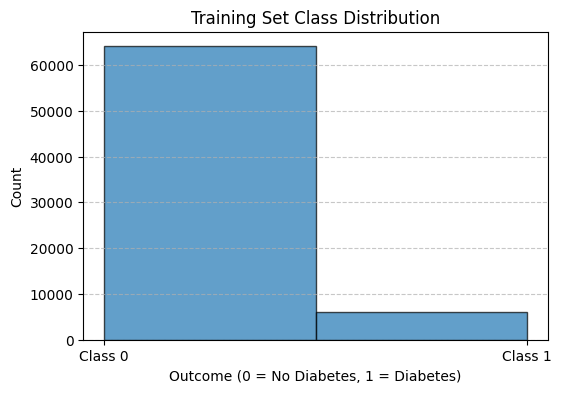

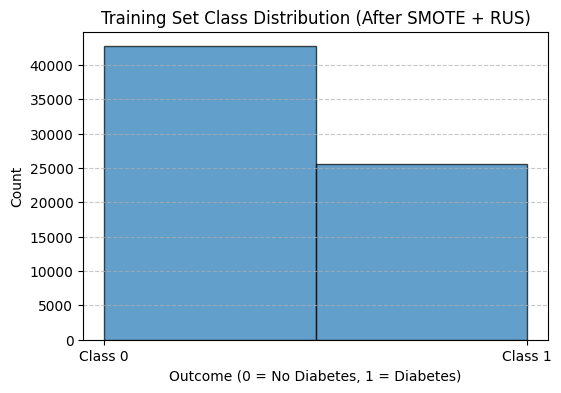

In [56]:
# First, split into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the remaining into development (15%) and test (15%)
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Print dataset shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Development set shape: {X_dev.shape}, {y_dev.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Plot Class Distribution Before SMOTE
def plot_class_distribution(y_data, title):
    plt.figure(figsize=(6,4))
    plt.hist(y_data, bins=2, edgecolor='black', alpha=0.7)
    plt.xticks([0,1], labels=['Class 0', 'Class 1'])
    plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot BEFORE applying SMOTE
plot_class_distribution(y_train, "Training Set Class Distribution")

# Apply SMOTE + RUS Hybrid
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # SMOTE first (40% minority cases)
rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)  # Then RUS (60% majority cases)

# Apply SMOTE first, then RUS
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_smote, y_train_smote)

# Plot AFTER applying SMOTE + RUS
plot_class_distribution(y_train_balanced, "Training Set Class Distribution (After SMOTE + RUS)")


# 5) Modelling

## Before Hyperparameter Tuning

In [57]:
# ✅ Step 1: Define Random Forest Model
rf_model = RandomForestClassifier()

# ✅ Step 2: Train Random Forest Model
rf_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_rf = rf_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
test_balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf) * 100

# ✅ Step 5: Print Scores
print("\nRandom Forest Model Performance")
print(f"Test Accuracy: {test_accuracy_rf:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_rf:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Performance
Test Accuracy: 95.7867%
Test Balanced Accuracy: 85.9231%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     13725
           1       0.76      0.74      0.75      1275

    accuracy                           0.96     15000
   macro avg       0.87      0.86      0.86     15000
weighted avg       0.96      0.96      0.96     15000



In [58]:
# ✅ Step 1: Define XGBoost Model
xgb_model = XGBClassifier()

# ✅ Step 2: Train XGBoost Model
xgb_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
test_balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb) * 100

# ✅ Step 5: Print Scores
print("\nXGBoost Model Performance")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_xgb:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))



XGBoost Model Performance
Test Accuracy: 96.5867%
Test Balanced Accuracy: 85.7199%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13725
           1       0.85      0.73      0.78      1275

    accuracy                           0.97     15000
   macro avg       0.91      0.86      0.88     15000
weighted avg       0.96      0.97      0.96     15000



In [59]:
# ✅ Step 1: Define LightGBM Model
lgb_model = lgb.LGBMClassifier()

# ✅ Step 2: Train LightGBM with Early Stopping Using Callbacks
lgb_model.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_test, y_test)],  # Validation set
    eval_metric="logloss",
    callbacks=[early_stopping(10)]  # ✅ Use callbacks instead of early_stopping_rounds
)

# ✅ Step 3: Make Predictions
y_pred = lgb_model.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred) * 100

# ✅ Step 5: Print Scores
print("\nLightGBM Model Performance")
print(f"Test Accuracy: {test_accuracy:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25620, number of negative: 42700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5918
[LightGBM] [Info] Number of data points in the train set: 68320, number of used features: 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0905432

LightGBM Model Performance
Test Accuracy: 96.6867%
Test Balanced Accuracy: 86.4860%

Classification Report:
               precisi

In [60]:
log_reg_pipeline = LogisticRegression()

# ✅ Step 2: Train Logistic Regression Model
log_reg_pipeline.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Make Predictions
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# ✅ Step 4: Compute Accuracy & Balanced Accuracy
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100
test_balanced_accuracy_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg) * 100

# ✅ Step 5: Print Scores
print("\nLogistic Regression Model Performance")
print(f"Test Accuracy: {test_accuracy_log_reg:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_log_reg:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Performance
Test Accuracy: 91.9467%
Test Balanced Accuracy: 88.1290%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     13725
           1       0.52      0.84      0.64      1275

    accuracy                           0.92     15000
   macro avg       0.75      0.88      0.80     15000
weighted avg       0.94      0.92      0.93     15000



Hybrid Models (XGBoost + Logistic Regression)

In [61]:
# ✅ Step 1: Define XGBoost Model
xgb_model = XGBClassifier(
    # objective="binary:logistic",
    # learning_rate=0.05,
    # n_estimators=100,
    # max_depth=6,
    # scale_pos_weight=0.8,  # Adjusted to reduce bias toward predicting "diabetes"
    # use_label_encoder=False,
    # eval_metric="logloss",
    # random_state=42
)

# ✅ Step 2: Train XGBoost Model
xgb_model.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Extract XGBoost Predictions (Probability Scores)
y_train_xgb = xgb_model.predict_proba(X_train_balanced)[:, 1]  # Use probabilities
X_test_xgb = xgb_model.predict_proba(X_test)[:, 1].reshape(-1, 1)  # Reshape for logistic regression

# ✅ Step 4: Standardize the Features (Needed for Logistic Regression)
scaler = StandardScaler()
y_train_xgb_scaled = scaler.fit_transform(y_train_xgb.reshape(-1, 1))
X_test_xgb_scaled = scaler.transform(X_test_xgb)

# ✅ Step 5: Train Logistic Regression on XGBoost Predictions
log_reg = LogisticRegression()
log_reg.fit(y_train_xgb_scaled, y_train_balanced)

# ✅ Step 6: Make Final Predictions Using Logistic Regression
y_pred_hybrid = log_reg.predict(X_test_xgb_scaled)

# ✅ Step 7: Compute Accuracy & Balanced Accuracy
test_accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid) * 100
test_balanced_accuracy_hybrid = balanced_accuracy_score(y_test, y_pred_hybrid) * 100

# ✅ Step 8: Print Scores
print("\nHybrid Model (XGBoost + Logistic Regression) Performance")
print(f"Test Accuracy: {test_accuracy_hybrid:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_hybrid:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


Hybrid Model (XGBoost + Logistic Regression) Performance
Test Accuracy: 96.1133%
Test Balanced Accuracy: 86.7775%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     13725
           1       0.78      0.76      0.77      1275

    accuracy                           0.96     15000
   macro avg       0.88      0.87      0.87     15000
weighted avg       0.96      0.96      0.96     15000



In [62]:
# Define model names
model_names = [
    "Random Forest", "XGBoost", "LightGBM", "Logistic Regression", "Hybrid (XGBoost + Logistic Regression)"
]

# Initialize lists for metrics
accuracy_values = []
balanced_accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Models and predictions dictionary
models_predictions = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred,
    "Logistic Regression": y_pred_log_reg,
    "Hybrid (XGBoost + Logistic Regression)": y_pred_hybrid
}

# Collect performance metrics for each model
for model, y_pred in models_predictions.items():
    accuracy_values.append(accuracy_score(y_test, y_pred))
    balanced_accuracy_values.append(balanced_accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_values.append(report['weighted avg']['precision'])
    recall_values.append(report['weighted avg']['recall'])
    f1_values.append(report['weighted avg']['f1-score'])

# Create DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": accuracy_values,
    "Balanced Accuracy": balanced_accuracy_values,
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values
})

# Print the table
print("\nModel Performance Summary")
print(results_df.to_string(index=False))


Model Performance Summary
                                 Model  Test Accuracy  Balanced Accuracy  Precision   Recall  F1-Score
                         Random Forest       0.957867           0.859231   0.957431 0.957867  0.957639
                               XGBoost       0.965867           0.857199   0.964322 0.965867  0.964639
                              LightGBM       0.966867           0.864860   0.965502 0.966867  0.965847
                   Logistic Regression       0.919467           0.881290   0.944028 0.919467  0.927782
Hybrid (XGBoost + Logistic Regression)       0.961133           0.867775   0.960595 0.961133  0.960845


ROC Curves & Confusion Matrix Before Hypertuning

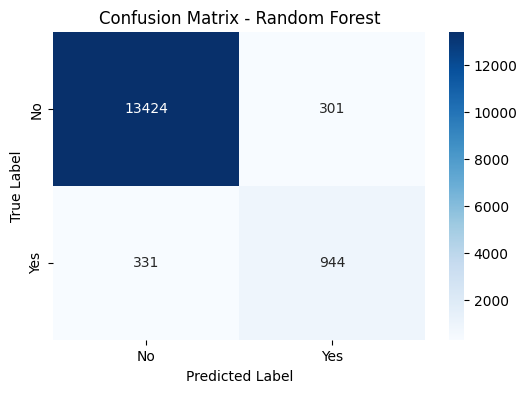

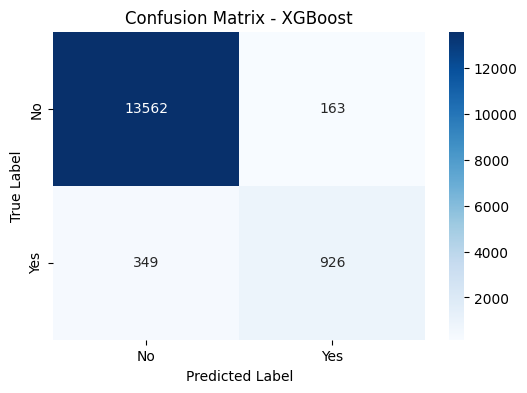

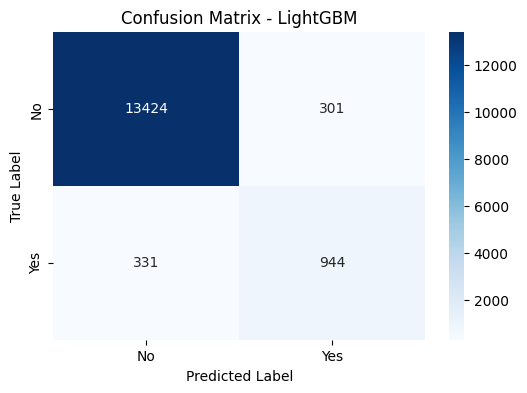

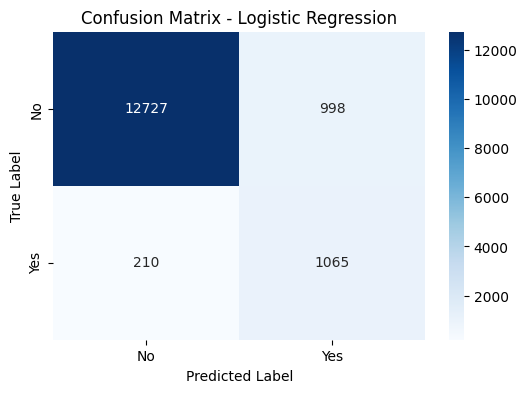

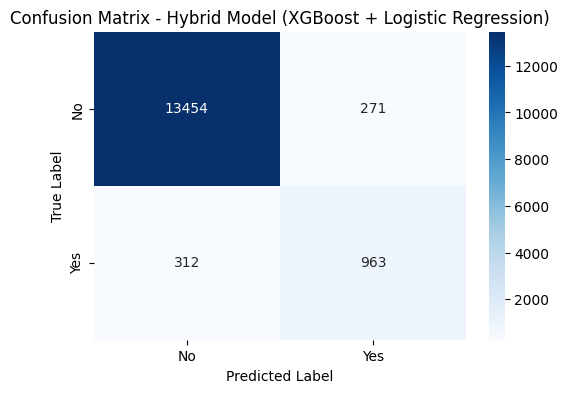

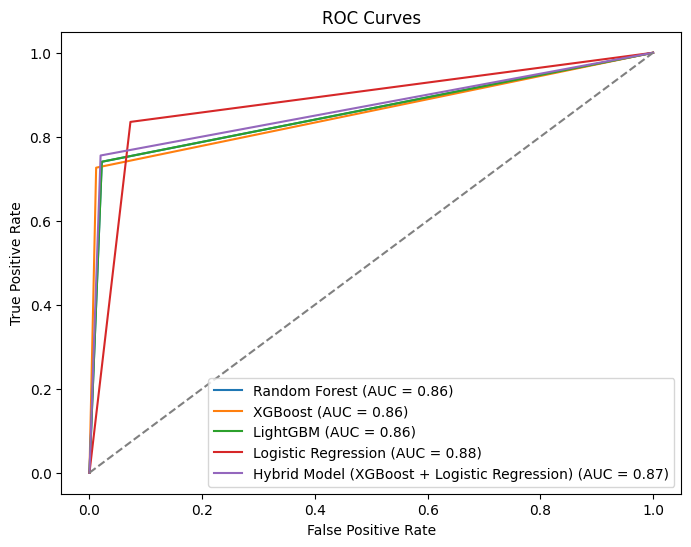

In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ✅ Define model predictions dictionary
models = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred,
    "Logistic Regression": y_pred_log_reg,
    "Hybrid Model (XGBoost + Logistic Regression)": y_pred_hybrid
}

# ✅ Confusion Matrices
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ✅ ROC Curves
plt.figure(figsize=(8, 6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

## After Hyperparameter Tuning

In [ ]:
# ✅ Step 1: Define Hyperparameter Grid for XGBoost
param_grid_xgb = {
    # "learning_rate": [0.01, 0.05, 0.1],
    # "n_estimators": [100, 200, 300],
    # "max_depth": [3, 5, 7],
    # "scale_pos_weight": [0.5, 1, 1.5]
    'learning_rate': [0.1], 
    'max_depth': [7], 
    'n_estimators': [300], 
    'scale_pos_weight': [1]
}

# ✅ Step 2: Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric="logloss", random_state=42), 
                               param_grid_xgb, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# ✅ Step 3: Train Best XGBoost Model
best_xgb = grid_search_xgb.best_estimator_
y_train_xgb = best_xgb.predict_proba(X_train_balanced)[:, 1]
X_test_xgb = best_xgb.predict_proba(X_test)[:, 1].reshape(-1, 1)

# ✅ Step 4: Standardize Features for Logistic Regression
scaler = StandardScaler()
y_train_xgb_scaled = scaler.fit_transform(y_train_xgb.reshape(-1, 1))
X_test_xgb_scaled = scaler.transform(X_test_xgb)

# ✅ Step 5: Define Hyperparameter Grid for Logistic Regression
param_grid_logreg = {
    # "C": [0.01, 0.1, 1, 10],
    # "solver": ["liblinear", "lbfgs"]
    'C': [0.01], 
    'solver': ['lbfgs']
}

# ✅ Step 6: Perform GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(class_weight="balanced", random_state=42),
                                   param_grid_logreg, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
grid_search_logreg.fit(y_train_xgb_scaled, y_train_balanced)

# ✅ Step 7: Train Best Logistic Regression Model
best_log_reg = grid_search_logreg.best_estimator_
y_pred_hybrid = best_log_reg.predict(X_test_xgb_scaled)

# ✅ Step 8: Compute Accuracy & Balanced Accuracy
test_accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid) * 100
test_balanced_accuracy_hybrid = balanced_accuracy_score(y_test, y_pred_hybrid) * 100

# ✅ Step 9: Print Scores
print("\nOptimized Hybrid Model (XGBoost + Logistic Regression) Performance")
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best Logistic Regression Hyperparameters: {grid_search_logreg.best_params_}")
print(f"Test Accuracy: {test_accuracy_hybrid:.4f}%")
print(f"Test Balanced Accuracy: {test_balanced_accuracy_hybrid:.4f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

Optimized Hybrid Model (XGBoost + Logistic Regression) Performance
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1}
Best Logistic Regression Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Test Accuracy: 95.9200%
Test Balanced Accuracy: 87.0631%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     13725
           1       0.76      0.76      0.76      1275

    accuracy                           0.96     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.96      0.96      0.96     15000



ROC Curves & Confusion Matrix After Hypertuning

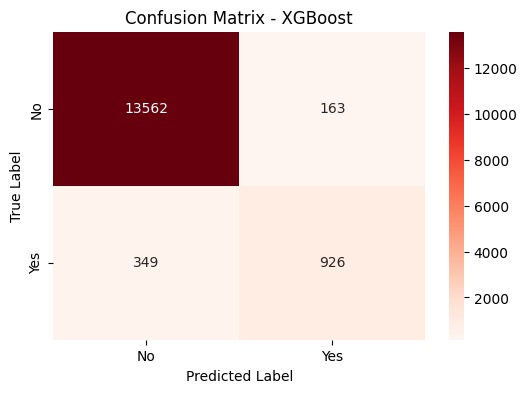

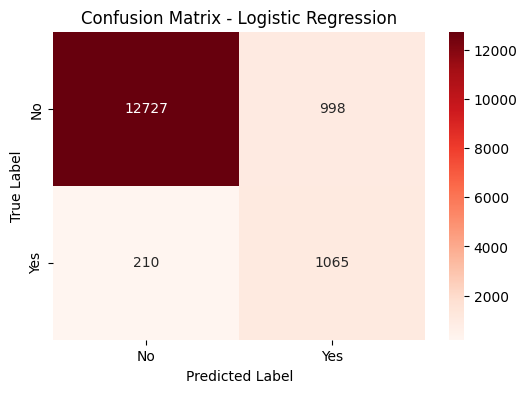

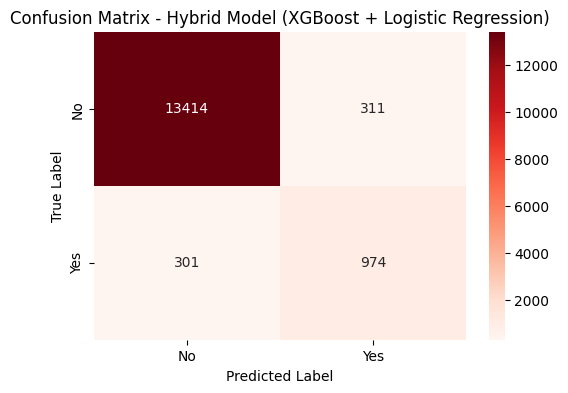

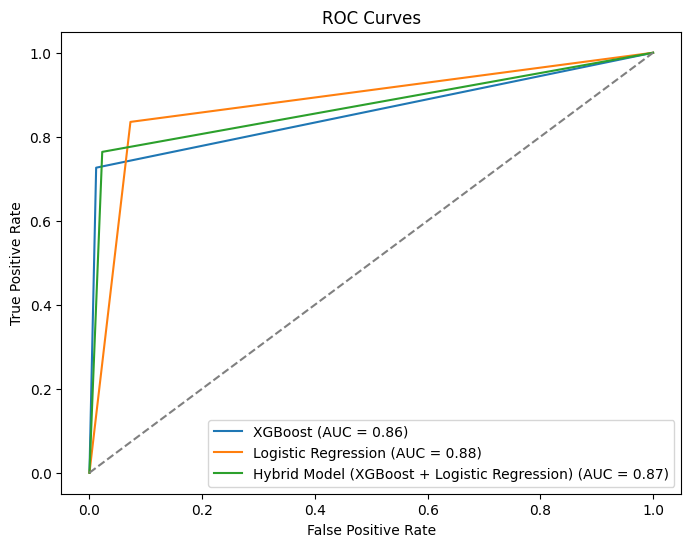

In [73]:
# ✅ Define model predictions dictionary
models = {
    "XGBoost": y_pred_xgb,
    "Logistic Regression": y_pred_log_reg,
    "Hybrid Model (XGBoost + Logistic Regression)": y_pred_hybrid
}

# ✅ Confusion Matrices
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ✅ ROC Curves
plt.figure(figsize=(8, 6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

# 5) Base Models

In [ ]:
# Validation scores of all base models
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
# models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# Cross-validation setup (10-fold CV on training data)
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
# evaluate each model in turn
smote_train_results = []
test_results = []
results = []
names = []

# 6) Model Tuning

### 1) Random Forests Tuning

In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators

KeyboardInterrupt: 

In [ ]:
gs_cv.best_params_

NameError: name 'gs_cv' is not defined

### 1.1) Final Model Installation

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(X,y)
cross_val_score(rf_tuned, X, y, cv = 10).mean()

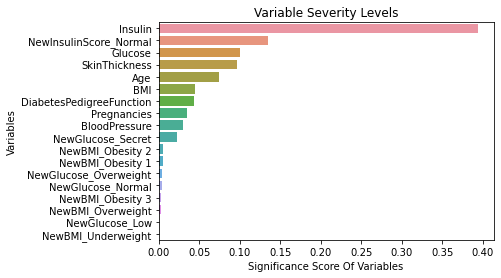

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 2) XGBoost Tuning

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 43.2min finished


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

### 2.1) Final Model Installation

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9013157894736843

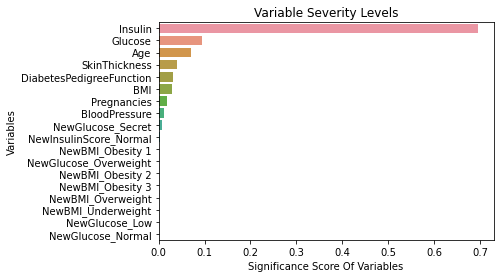

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# 7) Comparison of Final Models

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

# evaluate each model in turn
results = []
names = []

RF: 0.897368 (0.034211)
XGB: 0.901316 (0.028373)
LightGBM: 0.896053 (0.033000)


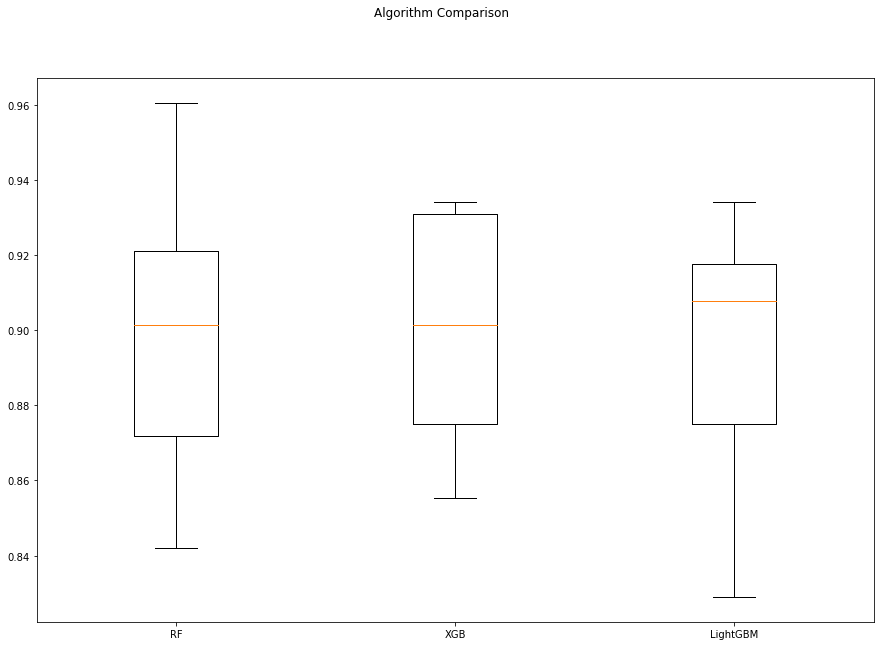

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)